# Classifying NBA Players into Performance Categories

### Introduction:
       
The objective of the project is to predict NBA players into performance categories based on their age, minutes played, and field goal attempts. The plan is to use regression analysis to estimate the average number of  points a player will score per game. We aim to answer the predictive question: Can one use a NBA player’s age, playing time, and field goal attempts to predict the number of points they will score per game on average? 
       
Only players who play center position will be included in the final dataset to ensure that the predicted performance is not influenced by their position, as different positions come with varying opportunities to score.
        
The selected dataset shows NBA player stats during the regular season from 2022-2023. The dataset was created by an international organization called Creative Commons (CC) that aims to supply the world with knowledge that serves the public interest. The dataset is updated consistently to maintain the accuracy of the statistics.


### Methods:

The variables/columns used will be Age (player’s age), MP (minutes played per game),and  FGA (field goal attempts) to create a predictive model for PTS (points per game scored by player).
    
The dataset encompasses players with multiple positions, therefore in order to fairly analyze each player’s performance, the filter function will be used to only include players who play C (center).
        
To visualize the relationships between age, minutes played per game, field goal attempts, and points scored per game, three scatterplots side-by-side to visualize the data. 


### Expected Outcomes and Significance

A clear trend in the number of points scored by a player per game in relation to their age, play time, and field goal attempts is expected to be found. These findings will hold significance when it comes to NBA player analysis for scouting and drafting.
    
This dataset may lead to further questions such as: What other aspects of players can be measured to determine who will be the most successful? Can the founded patterns and trends be applied to improve basketball worldwide and increase the performance of international teams? By finding ways to numerically measure a player’s stats, we can refine the evaluation process in the NBA.


### Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In order to wrangle the data we first have to load in all the necessary libraries in order to utilize the functions they provide. We load in the tidyverse package as it is helpful for data visualization and has functions such as ggplot, and we load in tidymodels for the regression that will be done later on. 

In [2]:
url <- "https://raw.githubusercontent.com/likaishin/dsci_basketball_project/main/NBA_Player_Stats_Regular.csv?token=GHSAT0AAAAAACJO6UWKI5GL2AYPH7XXQ7IGZJ6AGAQ"
player_data <- read_delim(url, delim = ";")
player_data

Rows: 679 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (3): Player, Pos, Tm
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,⋯,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,⋯,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,⋯,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,⋯,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,⋯,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,⋯,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,⋯,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,⋯,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4


As this data frame is alread in tidy format, we do not have to wrangle the data. 

In [3]:
player_data_filter <- filter(player_data, Pos == "C" & G >= 20)
player_data_filter

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,⋯,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,⋯,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,⋯,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,⋯,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3
17,Deandre Ayton,C,24,PHO,67,67,30.4,7.8,13.2,⋯,0.760,2.6,7.4,10.0,1.7,0.6,0.8,1.8,2.8,18.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
530,James Wiseman,C,21,TOT,45,22,19.3,4.2,7.5,⋯,0.701,1.6,4.3,5.9,0.7,0.2,0.6,1.1,2.4,10.0
530,James Wiseman,C,21,GSW,21,0,12.5,2.8,4.5,⋯,0.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9
530,James Wiseman,C,21,DET,24,22,25.2,5.4,10.2,⋯,0.712,2.3,5.8,8.1,0.7,0.2,0.8,1.5,2.9,12.7


We selected the players who are only playing the center position, as this is the position we selected to run our regression on. We also filtered the dataframe into centers who have played more than 20 games in order to increase the accuracy of our data and avoid any biases. 

In [4]:
player_data_select <- select(player_data_filter, Age, MP, FGA, PTS)
player_data_select 

Age,MP,FGA,PTS
<dbl>,<dbl>,<dbl>,<dbl>
23,20.7,7.3,9.2
29,27.0,6.3,8.6
25,34.6,14.9,20.4
24,32.6,9.2,14.3
24,30.4,13.2,18.0
⋮,⋮,⋮,⋮
21,19.3,7.5,10.0
21,12.5,4.5,6.9
21,25.2,10.2,12.7


In [5]:
player_data_split <- initial_split(player_data_select, prop = 0.75, strata = PTS)
player_data_training <- training(player_data_split)
player_data_training

Age,MP,FGA,PTS
<dbl>,<dbl>,<dbl>,<dbl>
23,10.0,2.0,3.5
30,8.1,1.6,2.2
23,9.6,2.5,3.3
30,14.3,3.4,4.3
23,8.2,2.7,4.3
⋮,⋮,⋮,⋮
20,28.9,10.7,14.8
28,37.4,18.5,24.2
26,29.4,11.8,18.0


Next, we select only the columns that we will utilize in the regression, the columns being age, MP(average minutes played per game), FGA(average field goal attempts per game), and PTS (average points scored per game). 

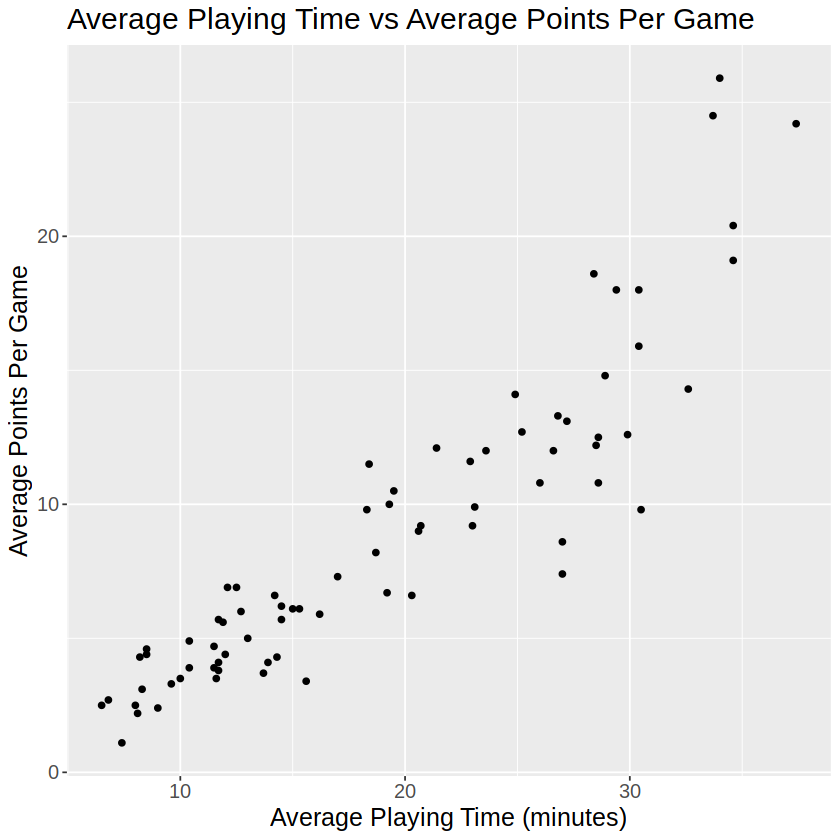

In [6]:
play_plot_2 <- ggplot(player_data_training, aes(x = MP, y = PTS))+
                geom_point()+
                xlab("Average Playing Time (minutes)") +
                ylab("Average Points Per Game")+
                ggtitle("Average Playing Time vs Average Points Per Game") +
                theme(text = element_text(size=15))
play_plot_2

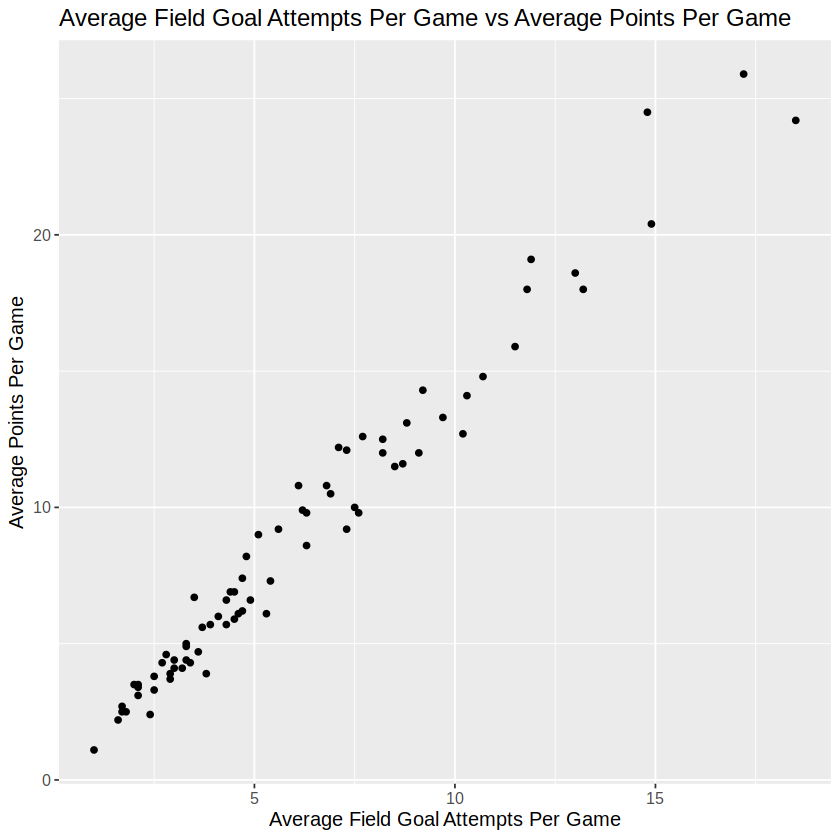

In [7]:
play_plot_3 <- ggplot(player_data_training, aes(x = FGA, y = PTS))+
                geom_point()+
                xlab("Average Field Goal Attempts Per Game") +
                ylab("Average Points Per Game") +
                ggtitle("Average Field Goal Attempts Per Game vs Average Points Per Game") +
                theme(text = element_text(size=12))
play_plot_3